In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
import pandas as pd

from sklearn.utils import shuffle

# from keras.utils import to_categorical

In [2]:
import os
for dirname, _, filenames in os.walk('C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\batches.meta
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\data_batch_1
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\data_batch_2
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\data_batch_3
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\data_batch_4
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\data_batch_5
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\readme.html
C:\Amin\Workspace\Data\CIFAR-10\cifar-10-batches-py\test_batch


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
info = unpickle('C:/Amin/Workspace/Data/CIFAR-10/cifar-10-batches-py/batches.meta')
info

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [5]:
data_batch_1 = unpickle('C:/Amin/Workspace/Data/CIFAR-10/cifar-10-batches-py/data_batch_1')

In [6]:
size = len(data_batch_1)
print("Size of the dictionary:", size)

keys = data_batch_1.keys()
print("Keys in the dictionary:", keys)

print("\nShape: ", np.shape(data_batch_1[b'data']))
print("\nOne record: ", data_batch_1[b'data'][0].astype(int))
print("\nLabels: ", np.array(data_batch_1[b'labels']))

Size of the dictionary: 4
Keys in the dictionary: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Shape:  (10000, 3072)

One record:  [ 59  43  50 ... 140  84  72]

Labels:  [6 9 9 ... 1 1 5]


In [7]:
def printPicture(subject):
    subjectR = subject[0:1024].reshape(32, 32)
    subjectG = subject[1024:2048].reshape(32, 32)
    subjectB = subject[2048:3072].reshape(32, 32)
    plotSubject = np.array([subjectR.T, subjectG.T, subjectB.T]).T
    plt.imshow(plotSubject)
    plt.tight_layout()

6 b'frog'


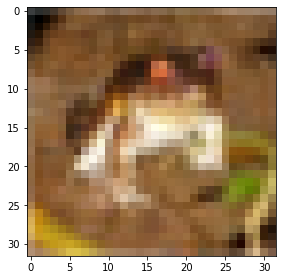

In [8]:
Sample_num = 0

printPicture(data_batch_1[b'data'][Sample_num])
print(data_batch_1[b'labels'][Sample_num], info[b'label_names'][data_batch_1[b'labels'][Sample_num]])

In [9]:
# import train (could be used for validation as well) data

data_features = np.empty((50000, 3072))
data_labels = np.empty((50000))

file_name = 'data_batch_'
for i in range(1, 6):
    print(file_name + str(i))
    data_batch = unpickle('C:/Amin/Workspace/Data/CIFAR-10/cifar-10-batches-py/data_batch_' + str(i))
    start_index = (i - 1) * 10000
    end_index = i * 10000
    data_features[start_index:end_index, :] = data_batch[b'data']
    data_labels[start_index:end_index] = data_batch[b'labels']    

data_batch_1
data_batch_2
data_batch_3
data_batch_4
data_batch_5


In [10]:
image_size = 32
num_images = 50000

data = data_features.reshape(num_images, image_size, image_size, 3)

In [11]:
X = np.asarray(data).squeeze() / 255.0
y = data_labels
# y = to_categorical(data_labels, 10)

X, y = shuffle(X, y)  # , random_state=0

In [12]:
# y[0]

In [13]:
model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=shape),
        tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
        
        # first hidden layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),  # , padding="same"
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        
        # second hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
    
        # third hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.MaxPool2D(pool_size=2),

    
        # fourth hidden layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

    
        # output layer
        tf.keras.layers.Dense(units=10)  # , activation=tf.nn.softmax , activation='softmax'
        ])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [15]:
model.compile(optimizer='adam',  # tf.keras.optimizers.Adam(),
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 'categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
# history = model.fit(
#     X, y,
# #     batch_size=64,
#     epochs=10,
# )

In [17]:
# history_df = pd.DataFrame(history.history)
# # Start the plot at epoch 5. You can change this to get a different view.
# history_df.loc[5:, ['loss']].plot();
# history_df.loc[5:, ['accuracy']].plot();

In [18]:
# import test data

test_data_features = np.empty((10000, 3072))
test_data_labels = np.empty((10000))

test_batch = unpickle('C:/Amin/Workspace/Data/CIFAR-10/cifar-10-batches-py/test_batch')

test_data_features = test_batch[b'data']
test_data_labels[:] = test_batch[b'labels']

In [19]:
image_size = 32
num_images = 10000

data_test = test_data_features.reshape(num_images, image_size, image_size, 3)

In [20]:
# predictions = model.predict(data_test)
X_te = np.asarray(data_test).squeeze() / 255.0
y_te = test_data_labels
# y_te = to_categorical(test_data_labels, 10)

In [21]:
history = model.fit(X, y, epochs=10, 
                    validation_data=(X_te, y_te))

Epoch 1/10
1563/1563 [==============================] - 23s 7ms/step - loss: 1.6020 - accuracy: 0.4232 - val_loss: 1.3684 - val_accuracy: 0.5066
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3133 - accuracy: 0.5320 - val_loss: 1.2777 - val_accuracy: 0.5458
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1910 - accuracy: 0.5782 - val_loss: 1.1956 - val_accuracy: 0.5792
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1038 - accuracy: 0.6110 - val_loss: 1.1539 - val_accuracy: 0.5955
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0390 - accuracy: 0.6334 - val_loss: 1.1431 - val_accuracy: 0.5971
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9857 - accuracy: 0.6530 - val_loss: 1.1116 - val_accuracy: 0.6121
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9322 - accuracy: 0.6706 - val_loss: 1.0876 - val_ac

In [22]:
# print(np.shape(X))
# test_loss, test_acc = model.evaluate(X_te,  y_te)
# print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.1312 - accuracy: 0.6212 - 1s/epoch - 4ms/step


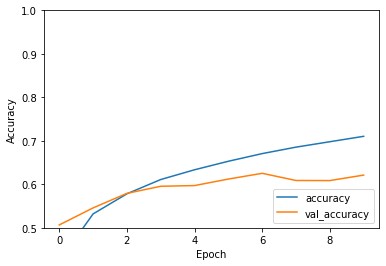

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_te,  y_te, verbose=2)